# Clustering & Hierarchical Clustering

**Objective:** This notebook focuses on K-Means clustering and Hierarchical clustering for a lecture

created by: Ari Sulistiyo Prabowo

**Contents**
- K-Means
- Hierarchical (Agglomerative Clustering)

Reference
- Udacity

In [36]:
#import library
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import linkage

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

## Data Preparation

In [19]:
# reading the dataset
bank_marketing = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/bank_marketing_final.csv")
bank_marketing = bank_marketing.iloc[:,1:]
bank_marketing

,job,marital,education,default,housing,loan,contact,poutcome,age_bin,result_from_ward
0,retired,married,basic.4y,unknown,yes,no,telephone,nonexistent,50-60,1
1,blue-collar,married,basic.6y,no,no,no,telephone,nonexistent,30-40,1
2,technician,single,university.degree,no,no,no,cellular,nonexistent,30-40,0
3,blue-collar,married,basic.6y,no,no,no,telephone,nonexistent,30-40,1
4,technician,married,university.degree,no,yes,no,cellular,nonexistent,30-40,0
...,...,...,...,...,...,...,...,...,...,...
24995,technician,married,university.degree,no,yes,no,cellular,nonexistent,40-50,0
24996,services,married,high.school,unknown,no,no,cellular,nonexistent,40-50,0
24997,blue-collar,divorced,basic.9y,no,no,no,cellular,nonexistent,30-40,1
24998,admin.,single,high.school,no,no,no,cellular,nonexistent,30-40,1


## Data Pre-processing

In [25]:
def label_encoding(data):
  """
  Let's encode the non_numerical data into a numerical value
  data: your dataset
  """
  data = data.drop('result_from_ward', axis=1)
  data_new = data.copy()

  #find non numerical variable/field
  object_data = data_new.select_dtypes(include=['object','category']).columns.to_list()

  #label encoder object
  label_encoding = LabelEncoder()

  #encode the data into a label
  for i in object_data:
    data_new[i] = label_encoding.fit_transform(data_new[i])

  return data_new

In [26]:
# labeling the data using label encoder
data_labeled = label_encoding(bank_marketing)
data_labeled.head()

,job,marital,education,default,housing,loan,contact,poutcome,age_bin
0,5,1,0,1,2,0,1,1,4
1,1,1,1,0,0,0,1,1,2
2,9,2,6,0,0,0,0,1,2
3,1,1,1,0,0,0,1,1,2
4,9,1,6,0,2,0,0,1,2


## Modelling

### K-Means

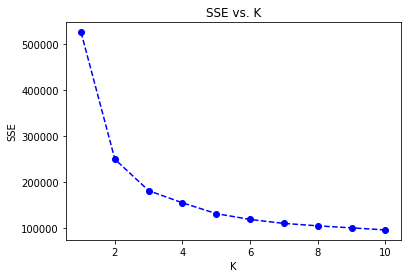

In [37]:
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

scores = []
centers = list(range(1,11))

for center in centers:
    scores.append(get_kmeans_score(data_labeled, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

The Elbow method is a visual method to test the consistency of the best number of clusters by comparing the difference of the sum of square error (SSE) of each cluster.

Number of clusters that significantly reduce the distance from each point to the center of cluster. At the same time increasing k does not appear to have substantial impact. Therefore, cluster with **four** or **five** is oke (judgement call)

### Hierarchical Clustering
To determine which clustering result better matches the original labels of the samples, we can use adjusted_rand_score which is an external cluster validation index which results in a score between -1 and 1, where 1 means two clusterings are identical of how they grouped the samples in a dataset (regardless of what label is assigned to each cluster).

In [27]:
# Hierarchical clustering using complete linkage
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(data_labeled)

# Hierarchical clustering using average linkage
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(data_labeled)

# Hierarchical clustering using ward linkage
ward = AgglomerativeClustering(n_clusters=3, linkage="ward")
ward_pred = ward.fit_predict(data_labeled)

In [28]:
# Evaluation

# complete
complete_ar_score = adjusted_rand_score(bank_marketing.result_from_ward, complete_pred)

# average
avg_ar_score = adjusted_rand_score(bank_marketing.result_from_ward, avg_pred)

# ward
ward_ar_score = adjusted_rand_score(bank_marketing.result_from_ward, ward_pred)

In [29]:
print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.7196592481480399 
Complete:  1.0 
Average:  0.5294775020740954


In [32]:
linkage_type = 'ward'

linkage_matrix = linkage(data_labeled, linkage_type)

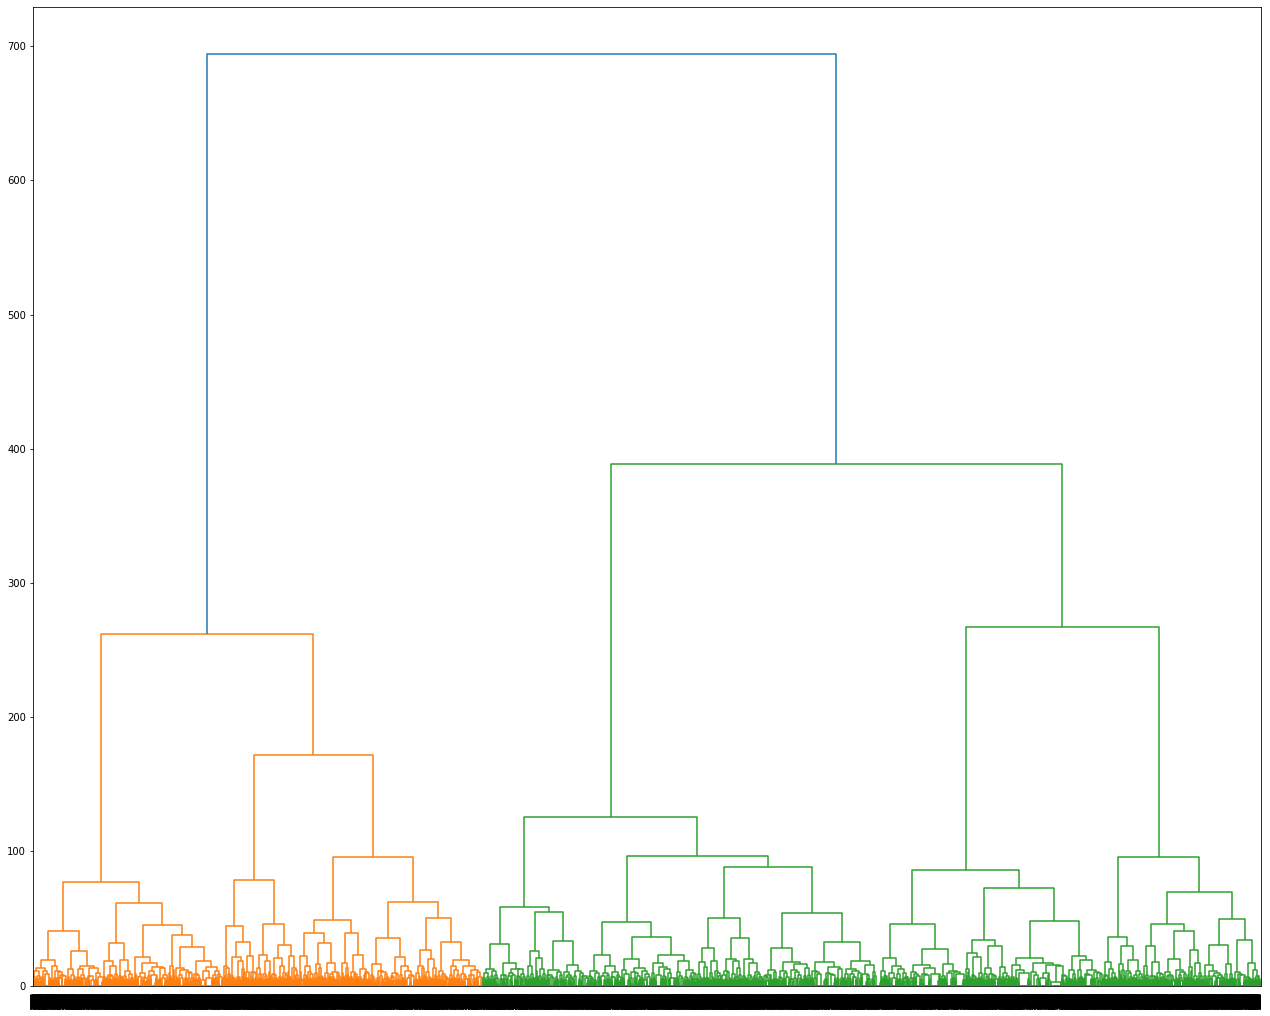

In [34]:
plt.figure(figsize=(22,18))

# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()